In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap3
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [2]:
import torch

In [3]:
import importlib
import d2l.regression as regression
from d2l.regression import LinearRegressionScratch, SyntheticRegressionDataScratch
from typing import List

importlib.reload(regression)

<module 'd2l.regression' from '/Users/jinceyang/Desktop/codebase/ml/learn_d2l/d2l/regression.py'>

In [4]:
rng = torch.Generator().manual_seed(42)  

In [5]:
regression_data = SyntheticRegressionDataScratch(w=torch.tensor([2, -3.4]), b=4.2, rng=rng)

In [6]:
regression = LinearRegressionScratch(num_features=2, lr=0.03, rng=rng)
with torch.no_grad():
    print(f"Initial weights: {regression.w.reshape((-1,))}, bias: {regression.b}") 

Initial weights: tensor([0.0195, 0.0037], requires_grad=True), bias: tensor([0.], requires_grad=True)


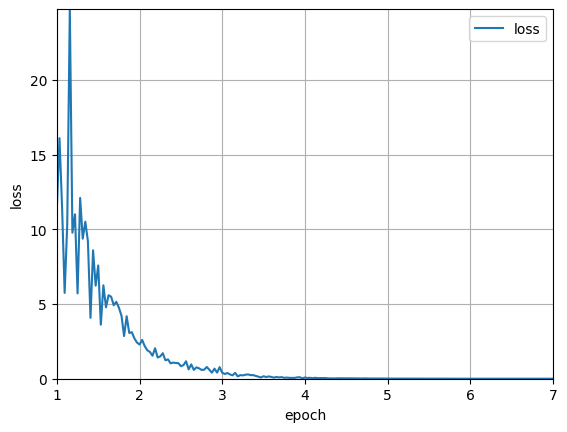

In [7]:
all_epoch_loss: List[List[float]] = regression.train(regression_data.get_train_data_loaders(batch_size=32, epochs=7))
regression.plot_loss(all_epoch_loss)

In [8]:
test_loss = regression.test(regression_data.get_test_data())

print(f"Test loss: {test_loss:.6f}")
with torch.no_grad():
    print(f"Learned weights: {regression.w.reshape((-1,))}, expected: [2, -3.4]")
    print(f"Learned bias: {regression.b}, expected: 4.2")

Test loss: 0.000074
Learned weights: tensor([ 1.9948, -3.3955], requires_grad=True), expected: [2, -3.4]
Learned bias: tensor([4.1945], requires_grad=True), expected: 4.2
